In [ ]:
from google.colab import files
file=files.upload()

Saving ds_salaries.csv to ds_salaries.csv


In [ ]:
# Array
import numpy as np

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pycountry -q
import pycountry

# Warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**Data Description**

**1.work_year [categorical] :** This represents the specific year in which the salary was disbursed. Different years may have different economic conditions which can impact the salary level.

**2.experience_level [categorical] :** The level of experience a person holds in a particular job. This is a key determinant in salary calculation as typically, more experienced individuals receive higher pay due to their advanced skills and knowledge.

**3.employment_type [categorical] :** The nature of the employment contract such as full-time, part-time, or contractual can greatly influence the salary. Full-time employees often have higher annual salaries compared to their part-time or contractual counterparts.

**4.job_title [categorical] :** The role an individual holds within a company. Different roles have different salary scales based on the responsibilities and skills required. For example, managerial roles typically pay more than entry-level positions.

**5.salary [numerical] :** The total gross salary paid to the individual. This is directly influenced by factors such as experience level, job title, and employment type.

**6.salary_currency [categorical] :** The specific currency in which the salary is paid, denoted by an ISO 4217 code. Exchange rates could affect the value of the salary when converted into different currencies.

**7.salaryinusd [numerical] :** The total gross salary amount converted to US dollars. This allows for a uniform comparison of salaries across different countries and currencies.

**8.employee_residence [categorical]:** The primary country of residence of the employee, denoted by an ISO 3166 code. The cost of living and prevailing wage rates in the employee's country of residence can impact salary levels.

**9.remote_ratio [ratio]:** The proportion of work done remotely. With the rise of remote work, companies may adjust salaries based on the cost of living in the employee's location and the proportion of remote work.

**10.company_location [categorical]:** The location of the employer's main office or the branch that holds the contract. Companies in different locations may offer different salary scales due to varying economic conditions and cost of living.

**11.company_size [categorical]:** The median number of employees in the company during the work year. Larger companies often have structured salary scales and may offer higher salaries due to economies of scale and larger revenue streams.

In [ ]:
# Data Import
ds_c=pd.read_csv("ds_salaries.csv")

# Taking Copy
ds=ds_c.copy()

# Data
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
# Data Info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
# Changing Data Type
cat=ds.select_dtypes(exclude=[np.number]) # Taking categorical values
for i in[cat.columns]:
  ds[i]=ds[i].astype("category")

# Data Info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   int64   
 1   experience_level    3755 non-null   category
 2   employment_type     3755 non-null   category
 3   job_title           3755 non-null   category
 4   salary              3755 non-null   int64   
 5   salary_currency     3755 non-null   category
 6   salary_in_usd       3755 non-null   int64   
 7   employee_residence  3755 non-null   category
 8   remote_ratio        3755 non-null   int64   
 9   company_location    3755 non-null   category
 10  company_size        3755 non-null   category
dtypes: category(7), int64(4)
memory usage: 152.4 KB


In [ ]:
# Checking Null Values
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# Checking statistical description
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
# Checking Categorical Values Distribution
for i in list(cat.columns):
  a=ds[i].value_counts()
  print(a)
  print(10*"====")

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
Cloud Data Architect            1
BI Data Engineer                1
Azure Data Engineer             1
Staff Data Scientist            1
Name: job_title, Length: 93, dtype: int64
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
DKK       3
JPY       3
TRY       3
HUF       3
THB       2
CZK       1
CLP       1
HKD       1
ILS       1
MXN       1
Name: salary_currency, dtype: int64
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
LU       1
KW       1
JE       1
IR       1
EE       1
Name: employee_residence, 

In [ ]:
# Grouping Job Title Column
def grouping_jt(text):
  dsci=['AI Scientist','Applied Data Scientist','Applied Machine Learning Scientist','Applied Scientist','Data Science Consultant','Data Science Lead','Data Science Manager','Data Science Tech Lead','Data Scientist Lead',
    'Data Scientist','Head of Data Science','Director of Data Science','Lead Data Scientist','Principal Data Scientist','Research Scientist','Product Data Scientist','Staff Data Scientist']
  da=['Analytics Engineer','BI Analyst','BI Data Analyst','Business Data Analyst','Compliance Data Analyst','Data Analyst','Data Analytics Lead','Data Analytics Engineer','Data Analytics Consultant','Data Analytics Specialist',
    'Data Analytics Manager','Data Architect','Data Operations Analyst','Data Quality Analyst','Finance Data Analyst','Financial Data Analyst','Insight Analyst','Lead Data Analyst','Marketing Data Analyst',
    'Principal Data Analyst','Product Data Analyst','Staff Data Analyst']
  ml=['Applied Machine Learning Engineer','Deep Learning Engineer','Deep Learning Researcher','Head of Machine Learning','Lead Machine Learning Engineer','Machine Learning Developer','Machine Learning Engineer',
    'Machine Learning Infrastructure Engineer','Machine Learning Manager','Machine Learning Research Engineer','Machine Learning Researcher','Machine Learning Scientist','Machine Learning Software Engineer','ML Engineer',
    'ML Ops Engineer','NLP Engineer','Principal Machine Learning Engineer','Research Engineer']
  de=['Azure Data Engineer','BI Data Engineer','Big Data Engineer','Businees Inteligence Engineer','Cloud Data Engineer','Cloud Database Engineer','Data DevOps Engineer','Data Engineer','Data Infrastructure Engineer',
    'Data Operations Engineer','ETL Engineer','Lead Data Engineer','Marketing Data Engineer','Principal Data Engineer','Software Data Engineer']


  if text in dsci:
    return "Data Scientist"
  elif text in da:
    return "Data Analyst"
  elif text in ml:
    return "Machine Learning Engineer"
  elif text in de:
    return "Data Engineer"
  else :
    return "Others"

# Applying The function to group the job descriptions 
ds['job_category']=ds['job_title'].apply(grouping_jt)

# Data 
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist


In [ ]:
# Renaming Experince Level & Employment Type & Company Size

def exp(text):
  if text=="SE":
    return "Sinior"
  elif text=="MI":
    return "Intermidiate"
  elif text=="EN":
    return "Fresher"
  else :
    return "Executive"

def e_t(text):
  if text=="FT":
    return "Full Time"
  elif text=="CT":
    return "Contractual"
  elif text=="PT":
    return "Part Time"
  else :
    return "Freelancer"

def c_s(text):
  if text=="L":
    return "Large"
  elif text=="M":
    return "Medium"
  else :
    return "Small"

ds['experience_level']=ds['experience_level'].apply(exp)
ds['employment_type']=ds['employment_type'].apply(e_t)
ds['company_size']=ds['company_size'].apply(c_s)

ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Sinior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,Data Scientist
1,2023,Intermidiate,Contractual,ML Engineer,30000,USD,30000,US,100,US,Small,Machine Learning Engineer
2,2023,Intermidiate,Contractual,ML Engineer,25500,USD,25500,US,100,US,Small,Machine Learning Engineer
3,2023,Sinior,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,Medium,Data Scientist
4,2023,Sinior,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,Medium,Data Scientist


In [ ]:
# Converting Country Code To Country Name
def cc_to_name(code):
  try:
    country=pycountry.countries.get(alpha_2=code)
    return country.name
  except:
    return code

ds['company_location']=ds['company_location'].apply(cc_to_name)

ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Sinior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,Spain,Large,Data Scientist
1,2023,Intermidiate,Contractual,ML Engineer,30000,USD,30000,US,100,United States,Small,Machine Learning Engineer
2,2023,Intermidiate,Contractual,ML Engineer,25500,USD,25500,US,100,United States,Small,Machine Learning Engineer
3,2023,Sinior,Full Time,Data Scientist,175000,USD,175000,CA,100,Canada,Medium,Data Scientist
4,2023,Sinior,Full Time,Data Scientist,120000,USD,120000,CA,100,Canada,Medium,Data Scientist


**EDA**



1.   Geospatial Analysis to find out the average salary location wise.



In [ ]:
#Install plot library
import plotly.express as px

avg_sal_loc=ds.groupby('company_location',as_index=False)['salary_in_usd'].mean()

# Ploting Geographical Data
fig=px.choropleth(avg_sal_loc,
                         locations='company_location',locationmode='country names',
                         hover_name='company_location',color='salary_in_usd',
                         title='Location Wise Average Salary',color_continuous_scale=px.colors.sequential.YlGn,
                         projection="natural earth1")
fig.show()

2.   Geospatial Analysis to find out the average remote ratio location wise.

In [ ]:
avg_rr_loc=ds.groupby('company_location',as_index=False)['remote_ratio'].mean()

# Plot Geographical Plot by Average Remote Ratio
fig1=px.choropleth(avg_rr_loc,
                   locations='company_location',locationmode='country names',color='remote_ratio',
                   hover_name='company_location',color_continuous_scale=px.colors.sequential.OrRd,
                   title="Location Wise Average Remote Ratio",projection="natural earth2")
fig1.show()

3.   Categorical Data Wise Salary Distribution (Bar Plot)

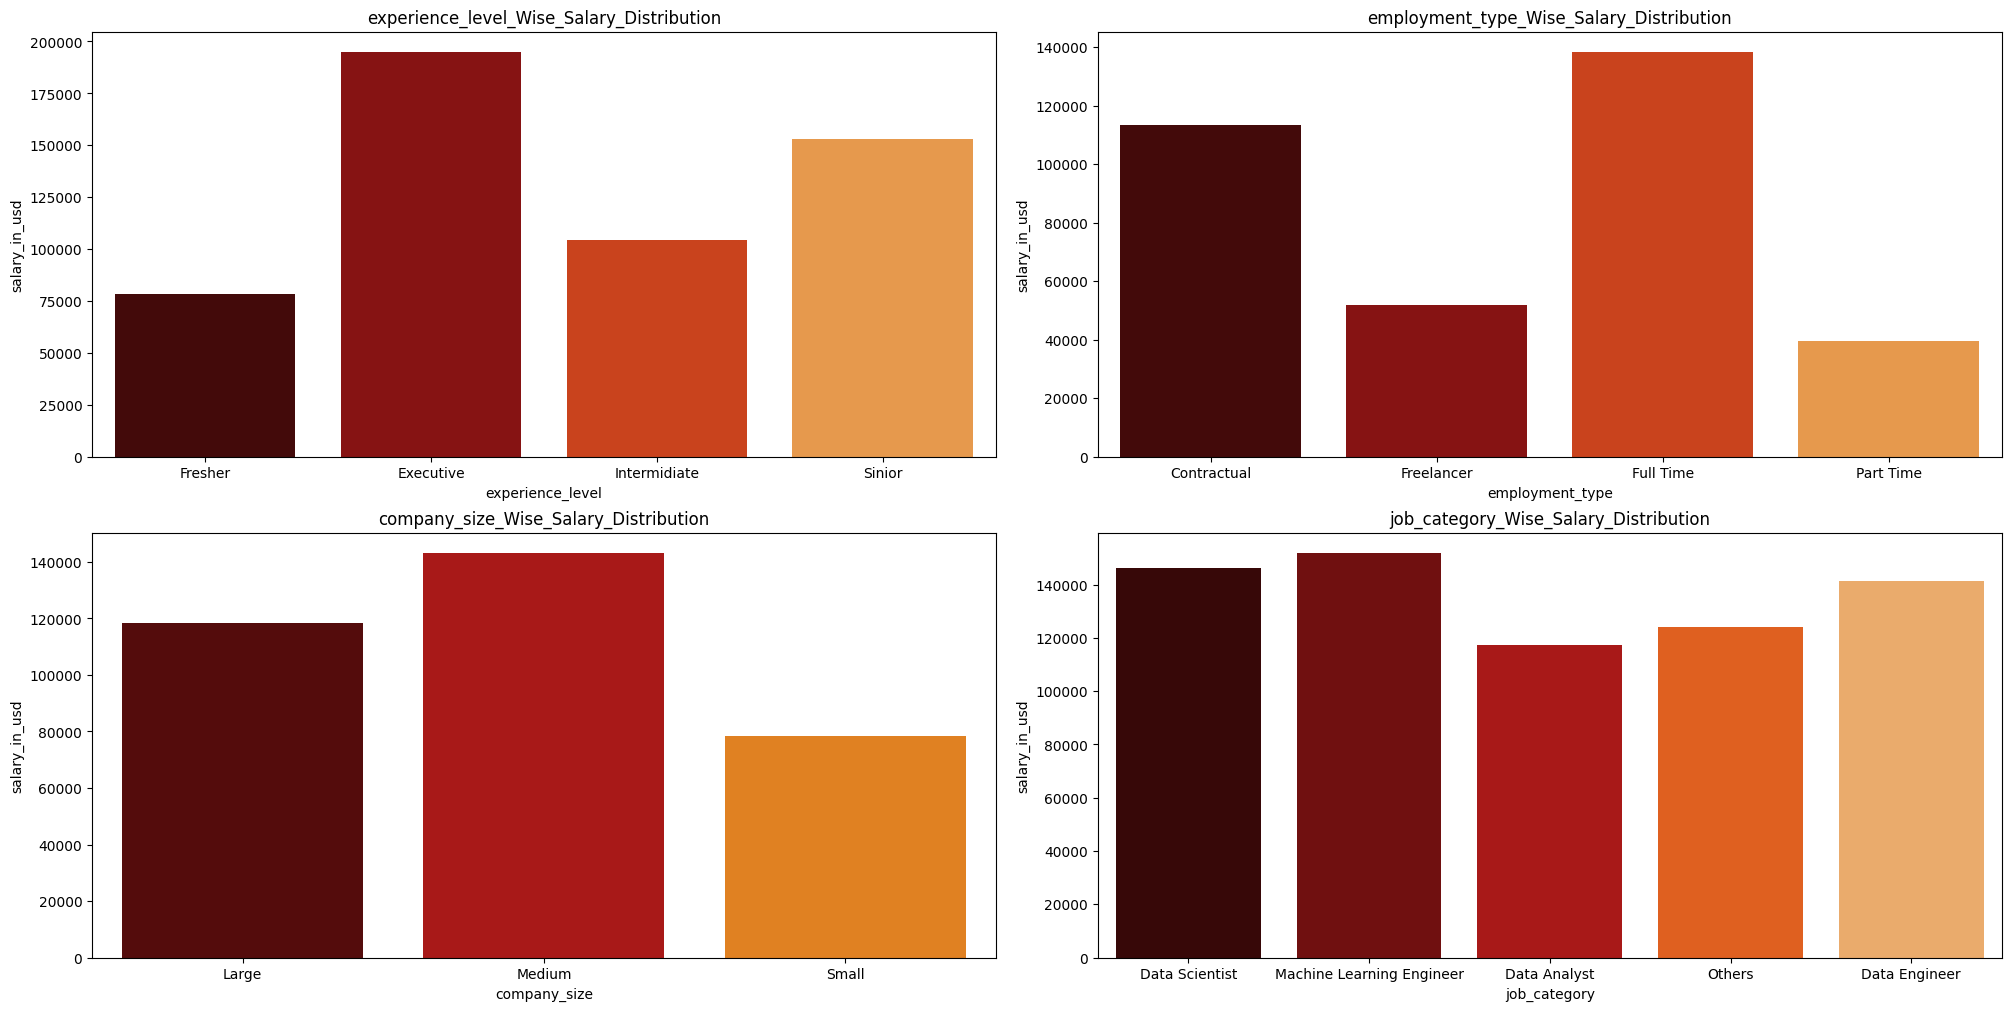

In [ ]:
lst=['experience_level', 'employment_type','company_size', 'job_category']
plt.figure(figsize=(20,10),layout='constrained')
for i in range(len(lst)):
  
  plt.subplot(2,2,i+1)
  plt.title(lst[i]+"_Wise_Salary_Distribution")
  sns.barplot(data=ds,x=lst[i],y='salary_in_usd',palette='gist_heat',ci=0)
plt.show()



*   If we go Experience Level Wise then Executive Experince holders are getting highest salary among all.
*   If we go Employment Type wise then Full Time workers are getting highest salary among all.

*   If we go Company size wise then Medium sized company are giving more salary to the employees
*   If we go Job Category wise then Machine Learning Enginners are getting highest salary among all.




4.   Categorical Data Wise data-distribution (Pie Plot)

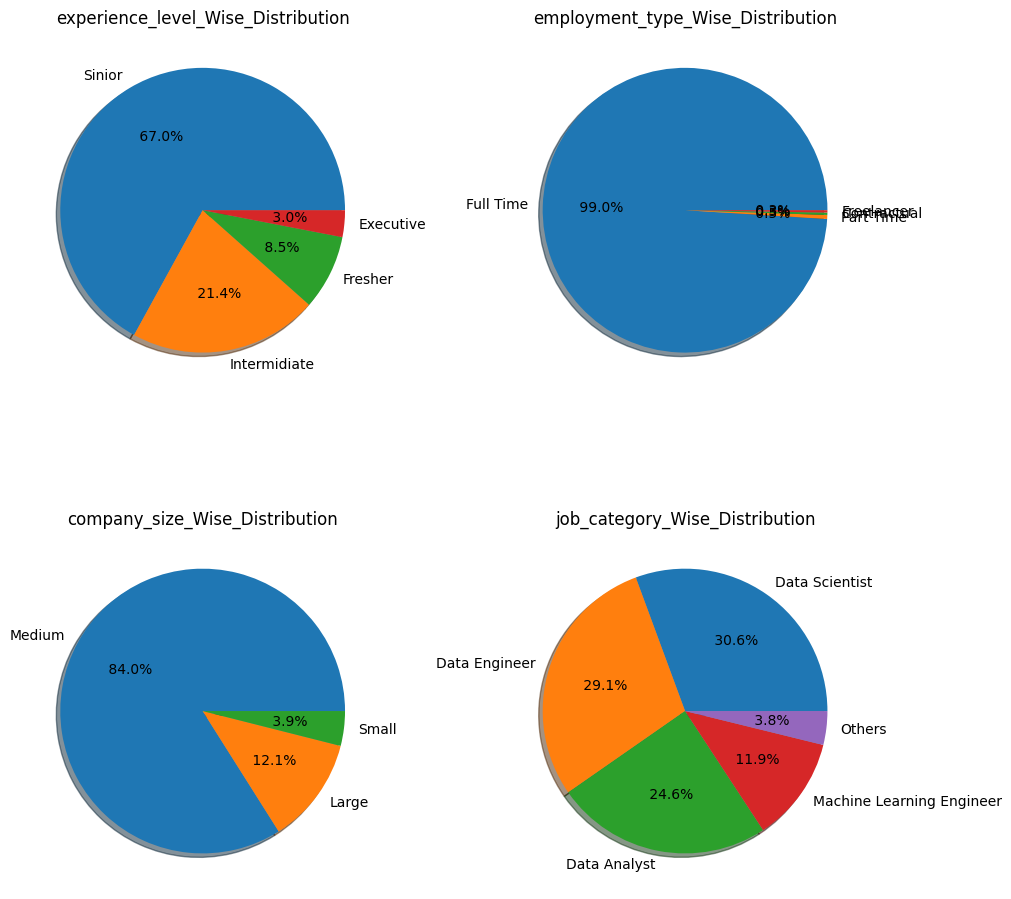

In [ ]:
lst=['experience_level', 'employment_type','company_size', 'job_category']
plt.figure(figsize=(10,10),layout='constrained')
for i in range(len(lst)):
  
  plt.subplot(2,2,i+1)
  a=ds[lst[i]].value_counts()
  lbl=a.index
  plt.title(lst[i]+"_Wise_Distribution")
  plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True,)
plt.show()

*   If we go Experience Level Wise then Sinior Experince holders are more in numbers among all.
*   If we go Employment Type wise then Full Time workers are more in numbers among all.

*   If we go Company size wise then Medium sized company are more in numbers among all.
*   If we go Job Category wise then Data Scientist are more in numbers among all.



5.   Categorical Data Wise Salary Distribution with Statistical Info (Box Plot)


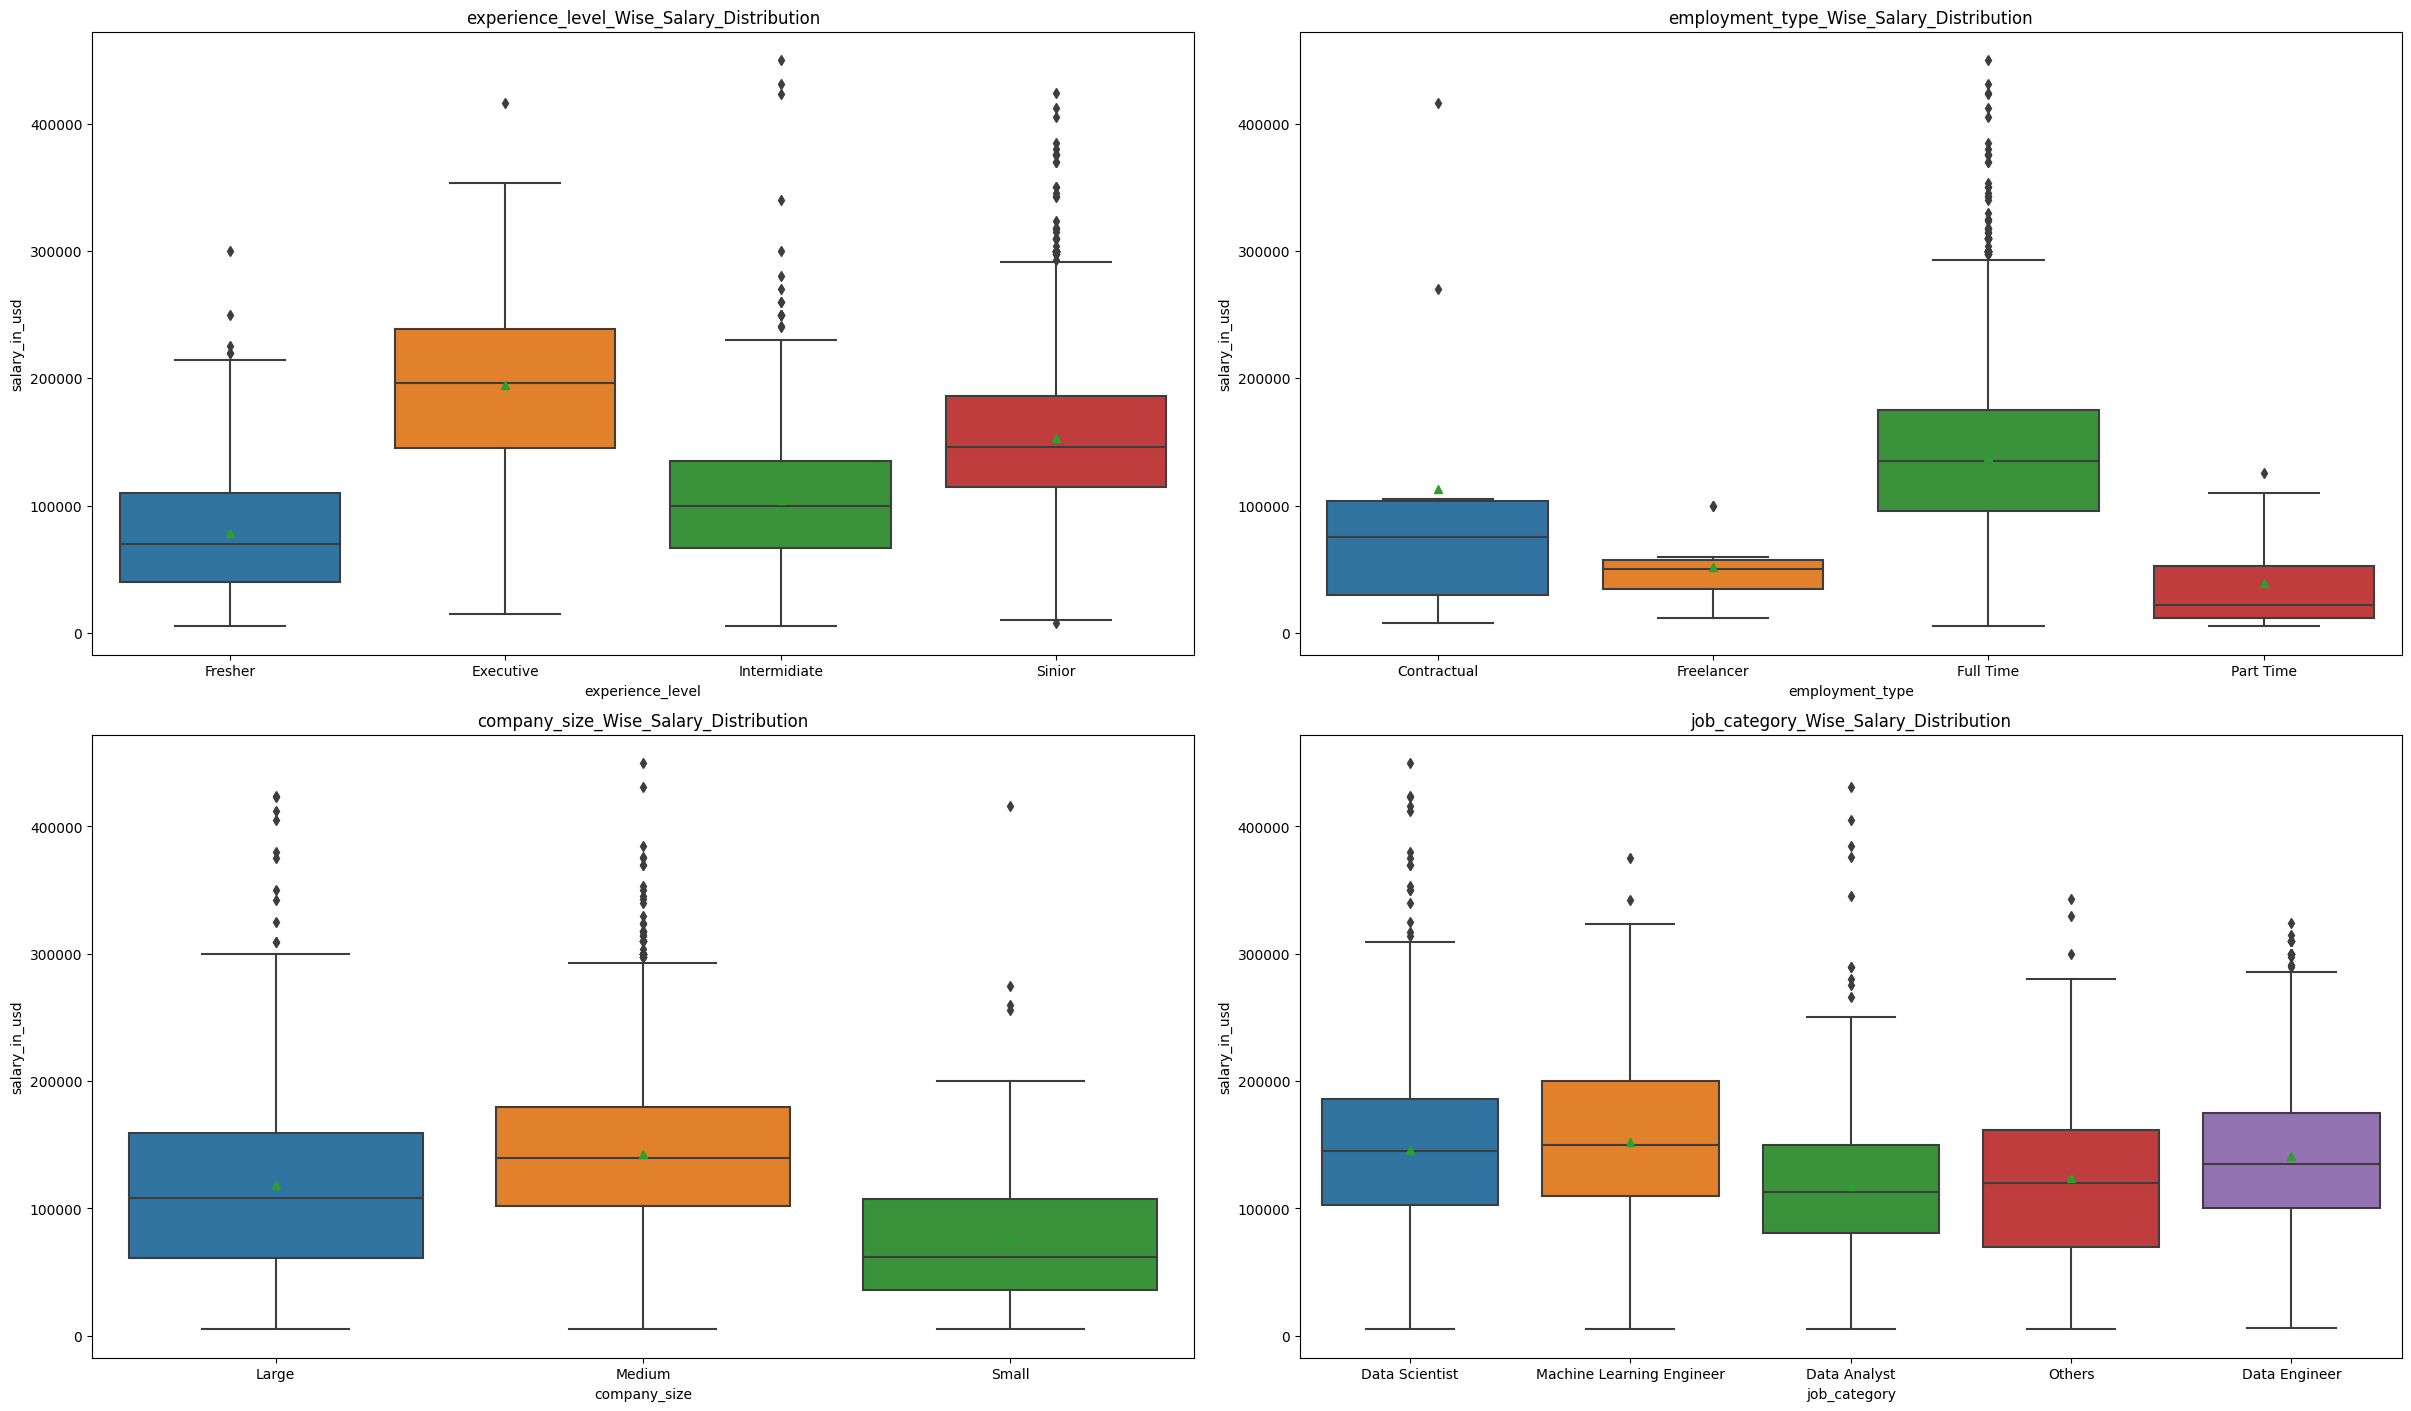

In [ ]:
lst=['experience_level', 'employment_type','company_size', 'job_category']
plt.figure(figsize=(24,14),layout='constrained')
for i in range(len(lst)):
  
  plt.subplot(2,2,i+1)
  plt.title(lst[i]+"_Wise_Salary_Distribution")
  sns.boxplot(data=ds,x=lst[i],y='salary_in_usd',showmeans=True)
plt.show()

*   If we go Experience Level Wise then Executive Experince holders Salary is normally distributed & the outliers is less compared to the rests.
*   If we go Employment Type wise then Full Time workers Salary is normally distributed but Freelancers salary have less disperssion of the data.

*   If we go Company size wise then Medium sized company Salary is normally distributed.
*   If we go Job Category wise then we can see salaries of every job category are normally distributed & Machine Learning Enginners salary is on higher side and the outliers are less compared to others.



6.   Categorical Data wise Salary Distribution to comapre the salary distribution (KDE Plot)



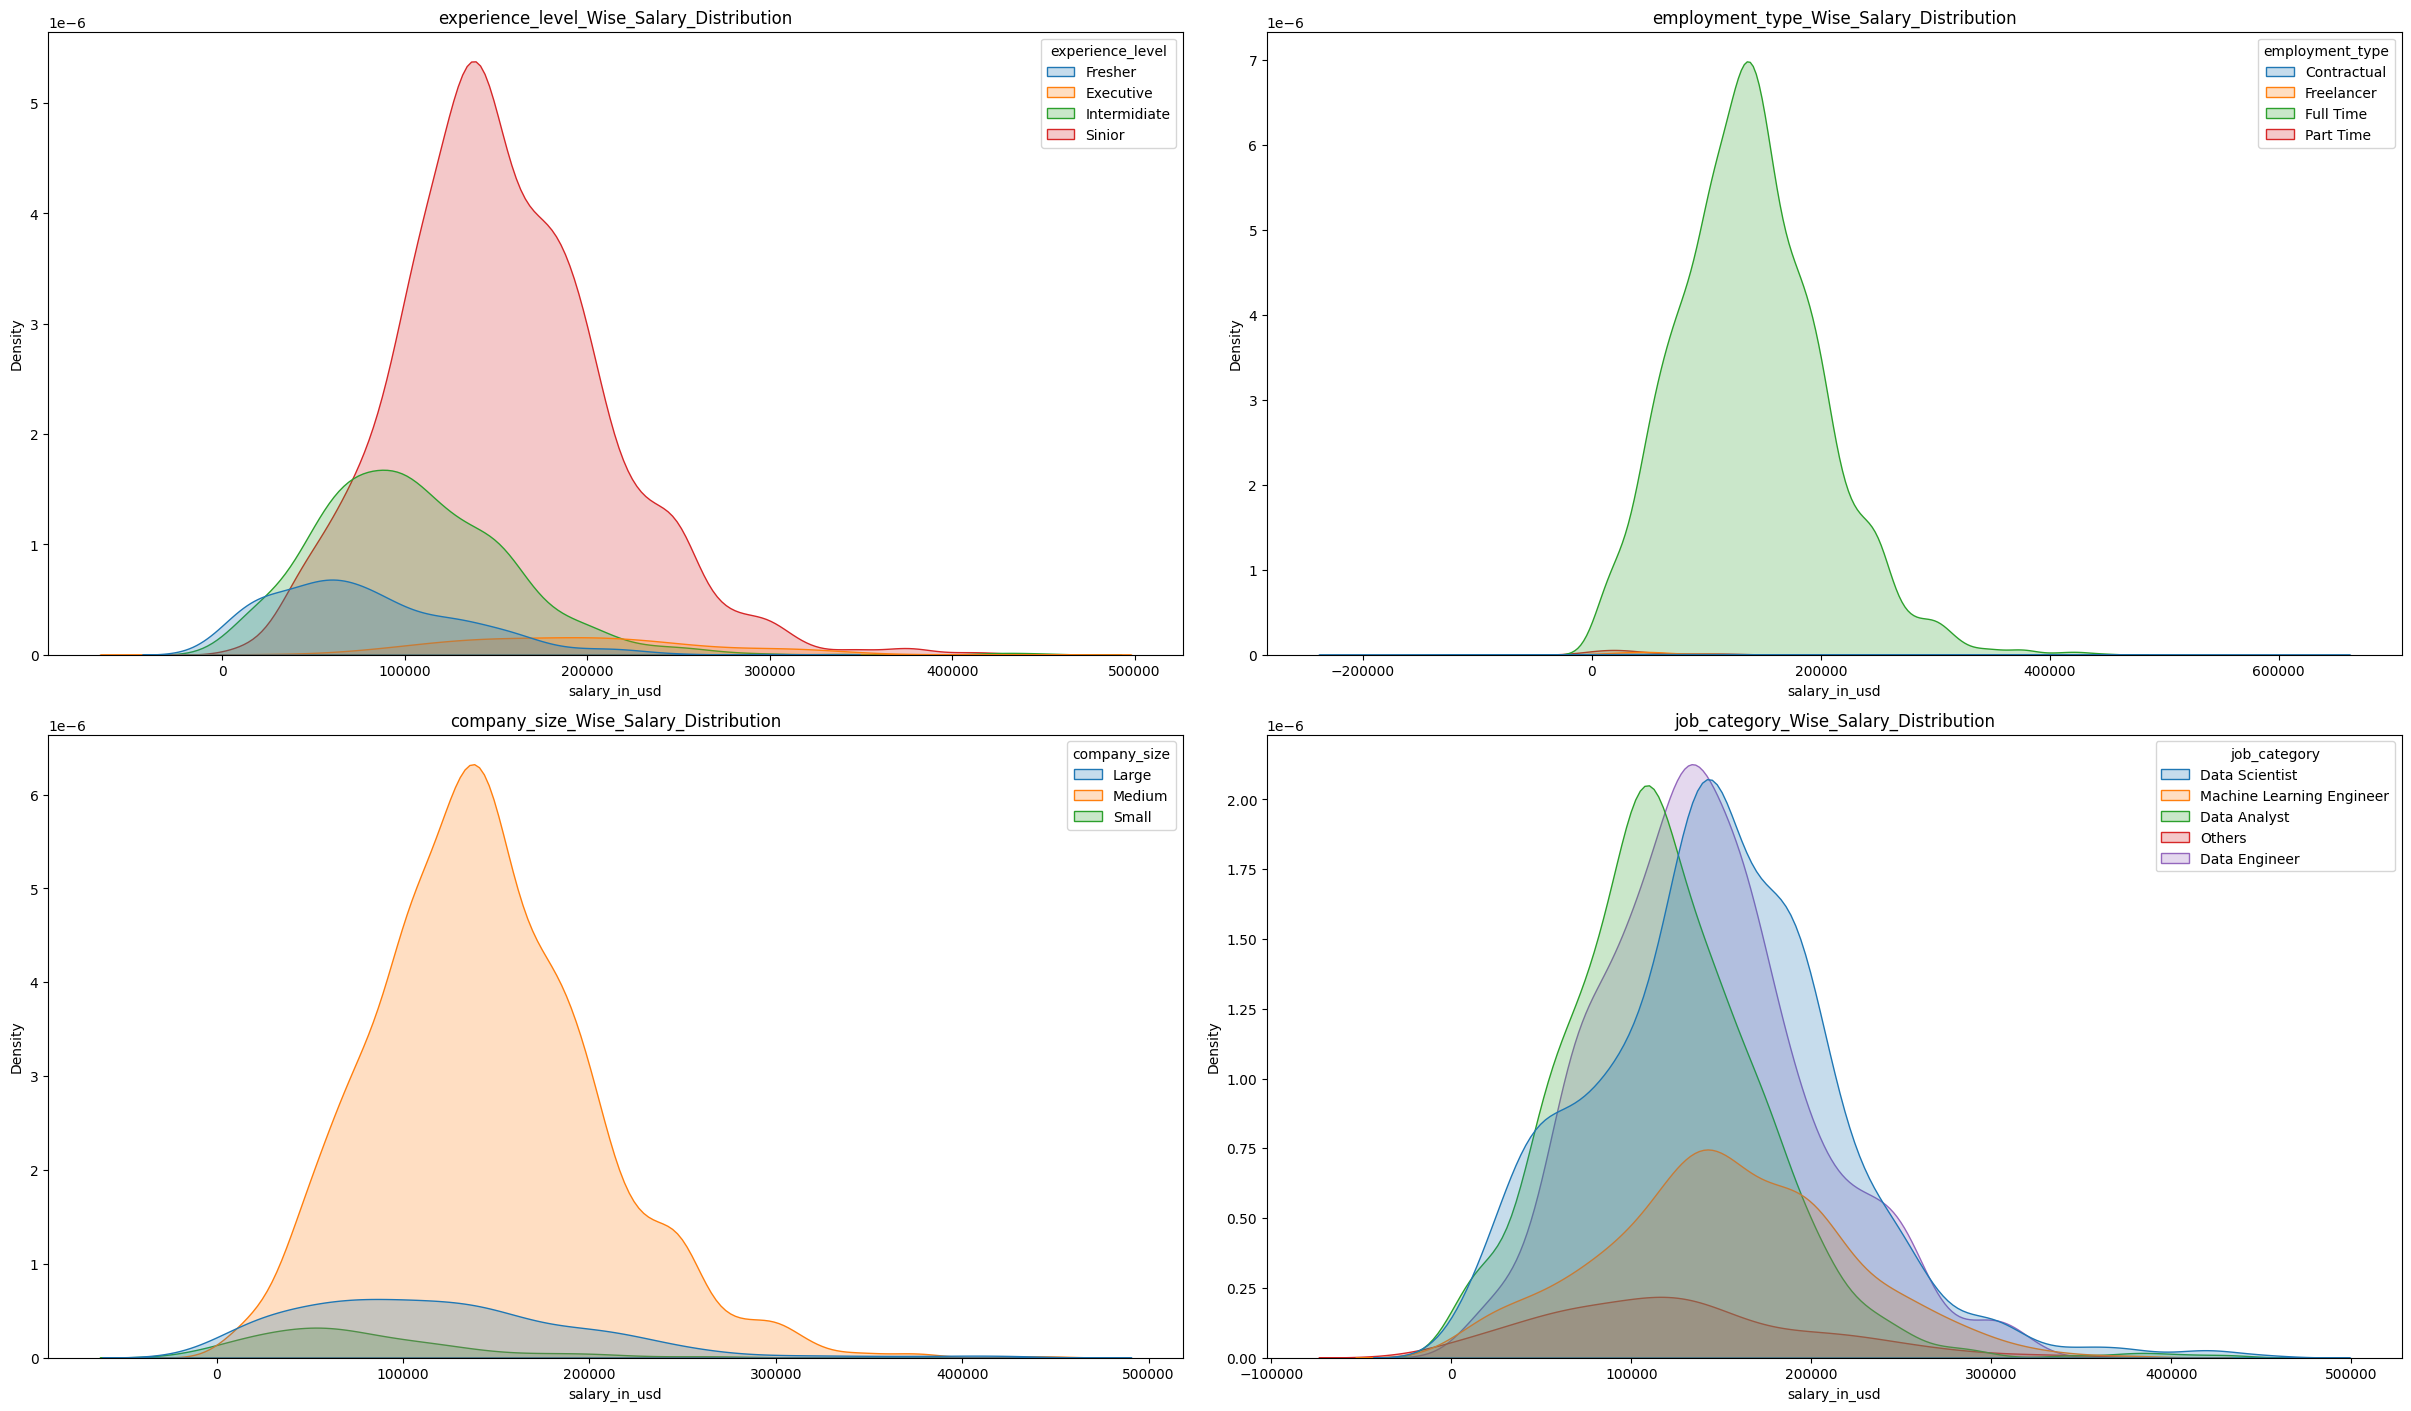

In [ ]:
lst=['experience_level', 'employment_type','company_size', 'job_category']
plt.figure(figsize=(24,14),layout='constrained')
for i in range(len(lst)):
  
  plt.subplot(2,2,i+1)
  plt.title(lst[i]+"_Wise_Salary_Distribution")
  sns.kdeplot(data=ds,hue=lst[i],x='salary_in_usd',shade=True)
plt.show()

*   If we go Experience Level Wise then Executive Experince holders are getting highest salary among all.
*   If we go Employment Type wise then Full Time workers are getting highest salary among all.

*   If we go Company size wise then Medium sized company are giving more salary to the employees
*   If we go Job Category wise then Machine Learning Enginners are getting highest salary among all.



7.   Categorical Data Wise Salary distribution over the years (Point Plot)



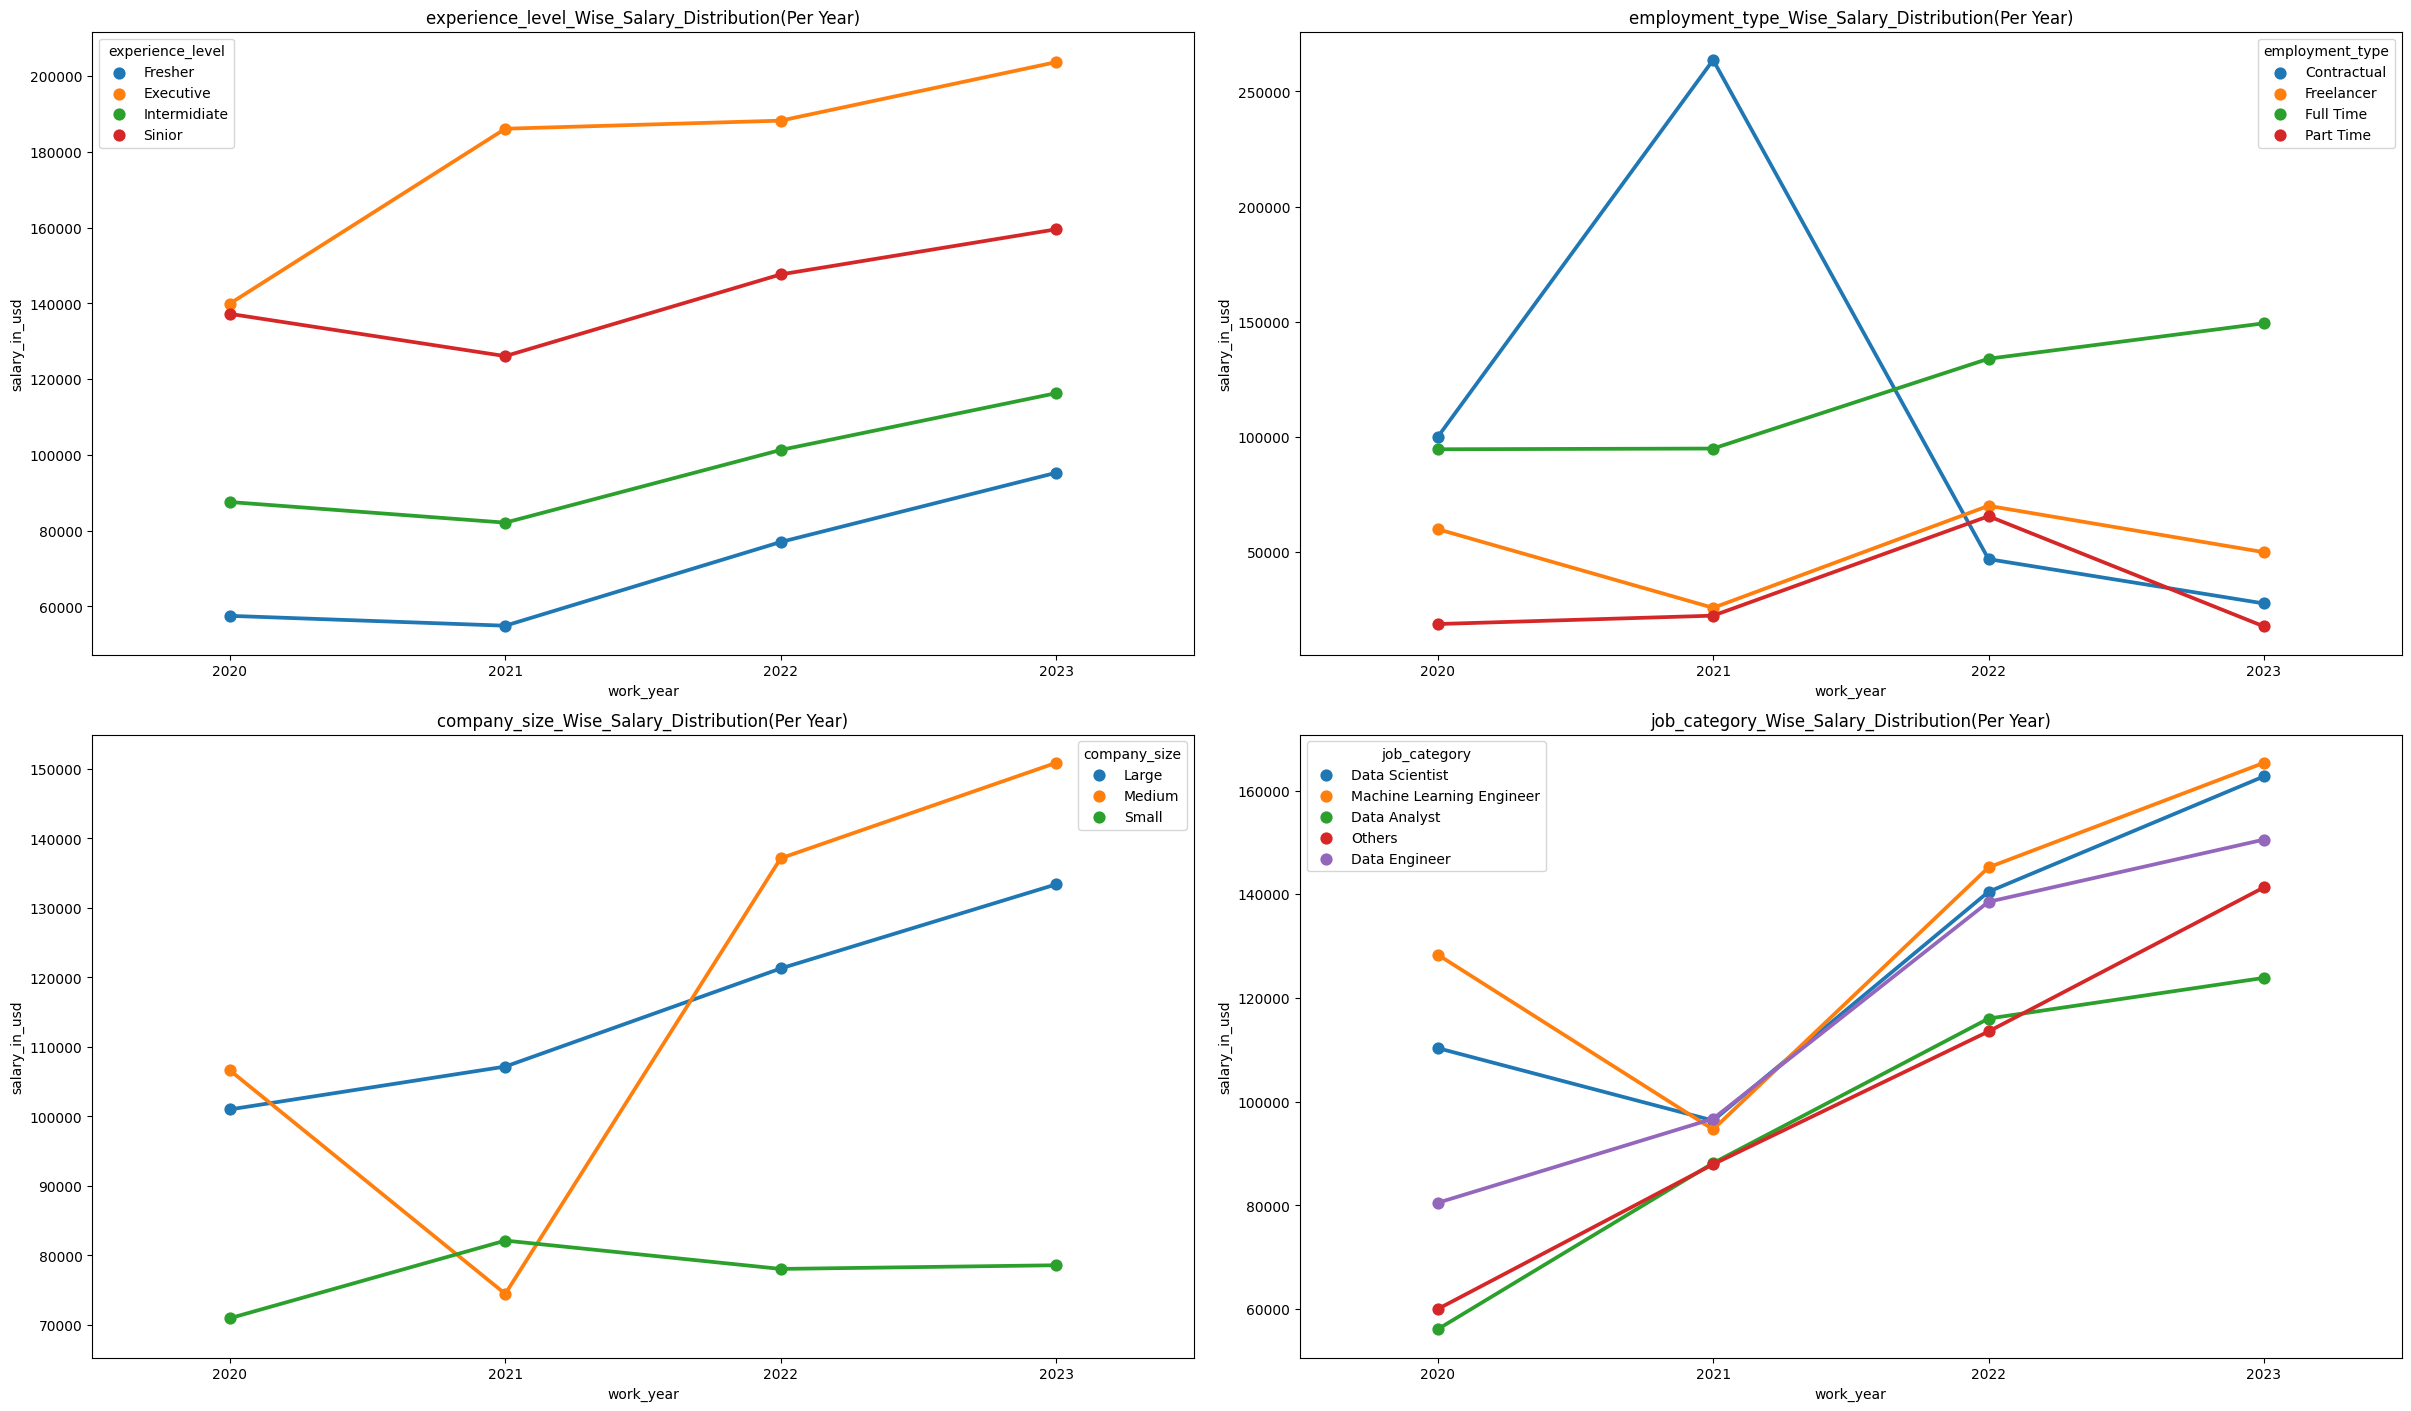

In [ ]:
lst=['experience_level', 'employment_type','company_size', 'job_category']
plt.figure(figsize=(24,14),layout='constrained')
for i in range(len(lst)):
  
  plt.subplot(2,2,i+1)
  plt.title(lst[i]+"_Wise_Salary_Distribution(Per Year)")
  sns.pointplot(data=ds,x='work_year',hue=lst[i],y='salary_in_usd',ci=0)
plt.show()

*   If we go Experience Level Wise then Salary of Executive Experince holders are increasing over the years.
*   If we go Employment Type wise then Salary of Full Time workers are increasing over the years & the Salary of Contractual Workers are first increasing then decresing over the years.

*   If we go Company size wise then Salary of Large sized companies are incresing over the years but in 2021 Medium sized companies salaries are suddenly decresing and at the same time small companies salaries are increased little a bit. So we can say that at the time of pandemic Medium Sized companies are on recession & at the same time Small sized companies are on hiring.
*   If we go Job Category wise then Salary of Data Scientist decreased at the year 2021 and after 2021 it increased gradually.

** Dashboard **
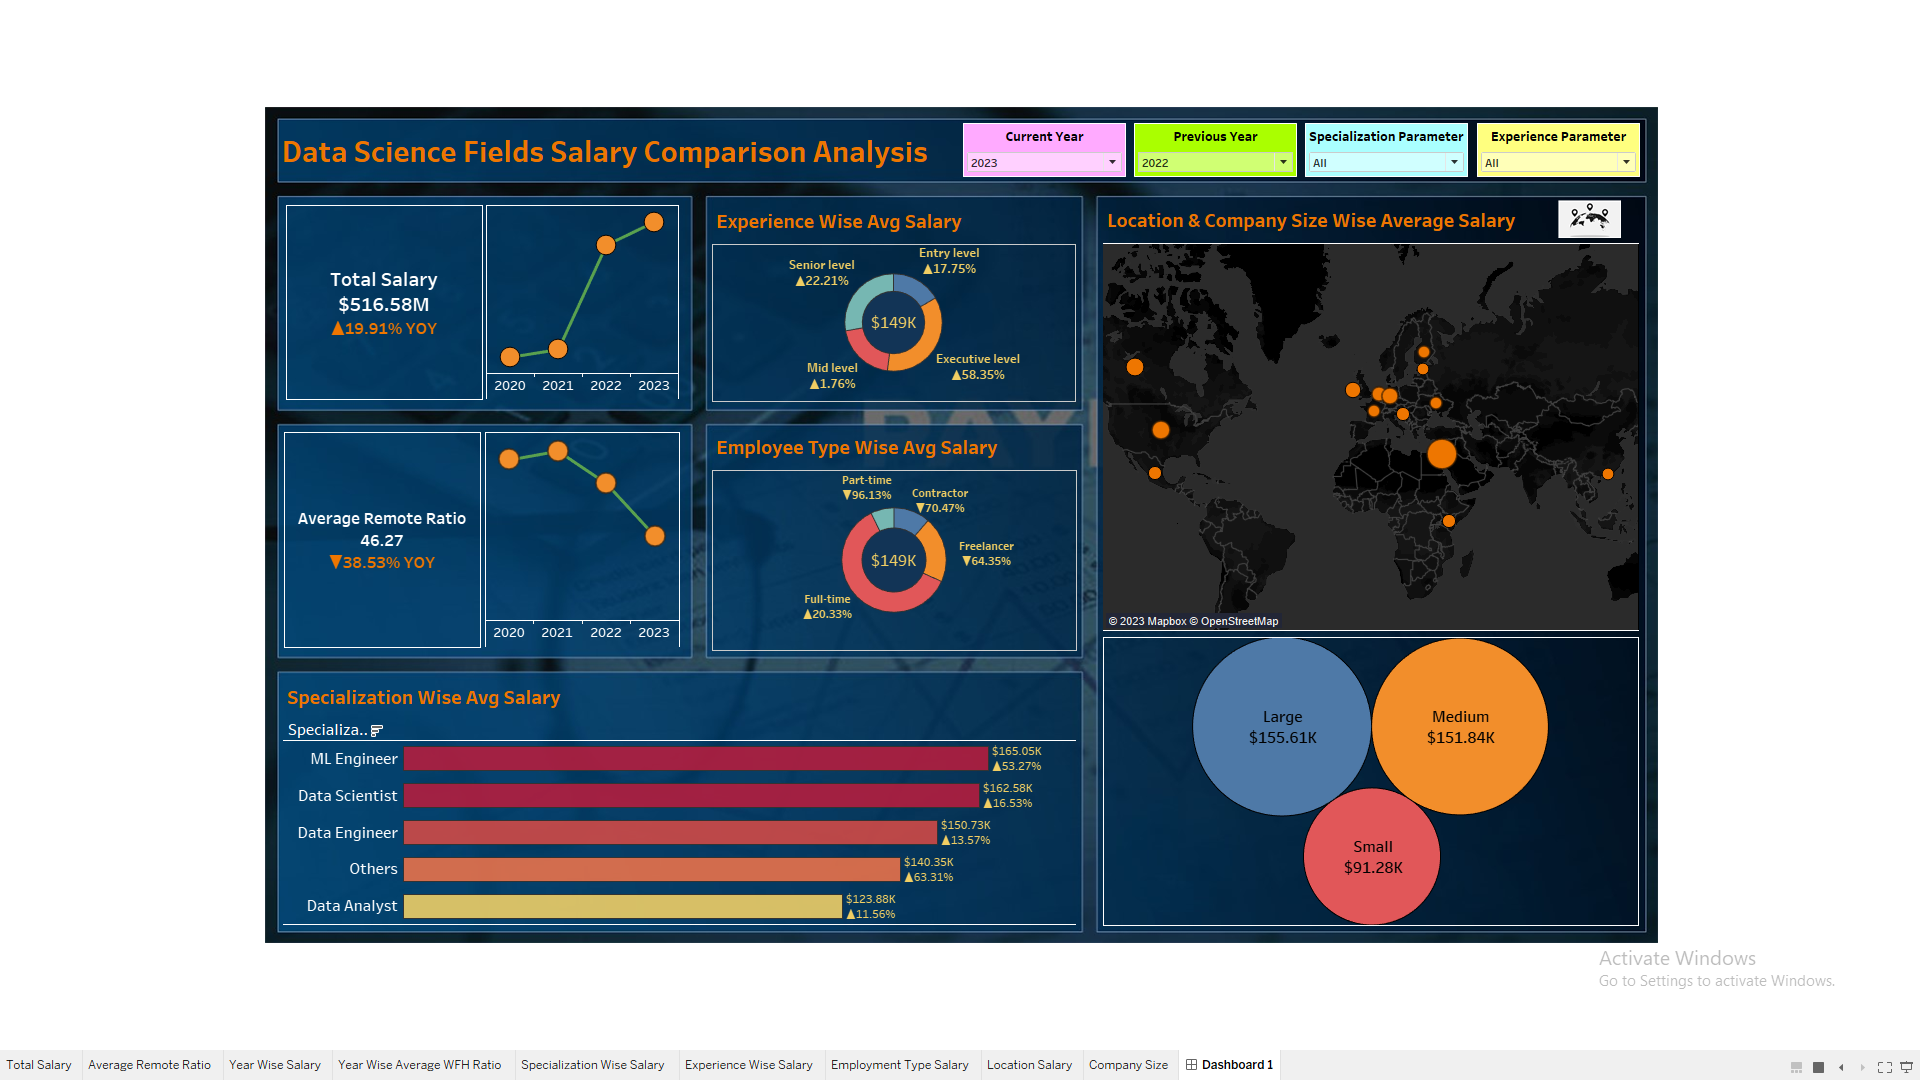

**Haven't Found what are you looking ? / Wants more granularity & clarification over the visualization ?  
Click the Link Below and then click on full screen to enjoy the dashboard 🥰**

https://public.tableau.com/app/profile/subhranil.mondal/viz/DSsalaryComparison/Dashboard1

**Machine Learning Analysis**

In [ ]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict,KFold,train_test_split

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error

# Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Label Encoding Categorical Values
cat=ds.select_dtypes(exclude=[np.number])

for i in list(cat.columns):
  ds[i+"_encoder"]=LabelEncoder().fit_transform(ds[i])

# Data Scaling
num=ds.select_dtypes(include=[np.number])

scl=pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

# Data After Scaling
scl.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_encoder,employment_type_encoder,job_title_encoder,salary_currency_encoder,employee_residence_encoder,company_location_encoder,company_size_encoder,job_category_encoder
0,1.0,0.002435,0.181436,1.0,1.000000,0.666667,0.913043,0.368421,0.337662,0.873239,0.0,0.50
1,1.0,0.000790,0.055900,1.0,0.666667,0.000000,0.717391,1.000000,0.974026,0.985915,1.0,0.75
2,1.0,0.000642,0.045784,1.0,0.666667,0.000000,0.717391,1.000000,0.974026,0.985915,1.0,0.75
3,1.0,0.005560,0.381839,1.0,1.000000,0.666667,0.510870,1.000000,0.142857,0.169014,0.5,0.50
4,1.0,0.003751,0.258207,1.0,1.000000,0.666667,0.510870,1.000000,0.142857,0.169014,0.5,0.50


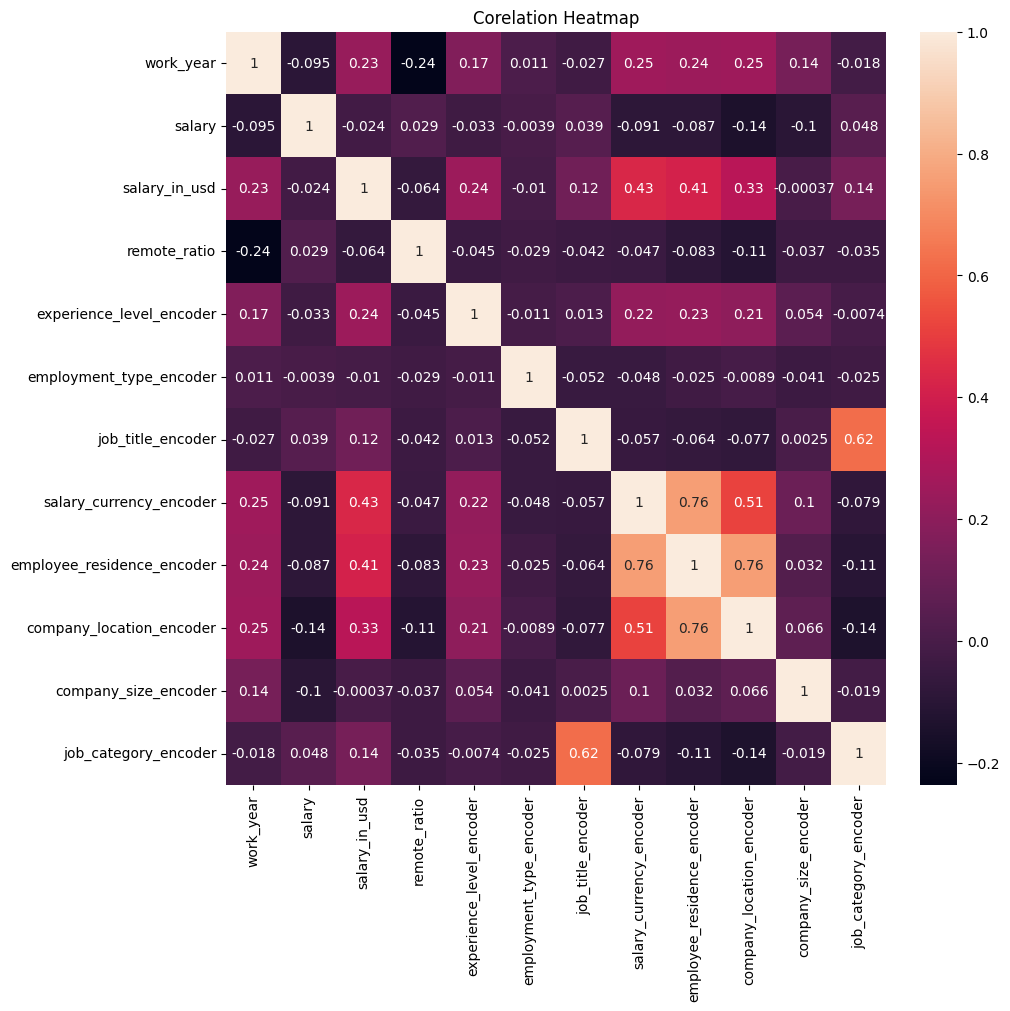

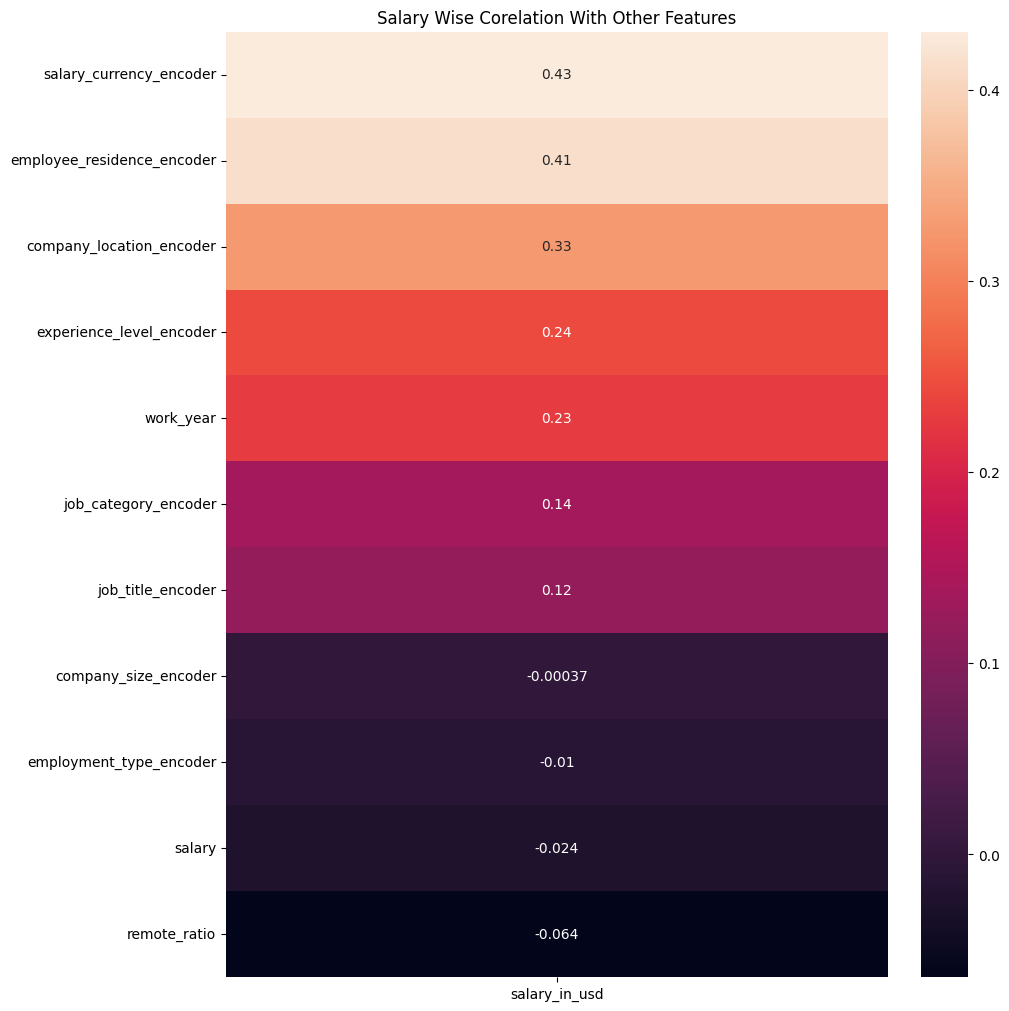

In [ ]:
# Corelation Plot To visualize Corelation among the features
cor=scl.corr()
plt.figure(figsize=(10,10),layout='constrained')
plt.title("Corelation Heatmap")
sns.heatmap(cor,annot=True)
plt.show()

# Target Variable wise Corelation
target=scl.corr()
target_f=target['salary_in_usd'].drop('salary_in_usd')
target_sort=target_f.sort_values(ascending=False)
plt.figure(figsize=(10,10),layout='constrained')
plt.title("Salary Wise Corelation With Other Features")
sns.heatmap(target_sort.to_frame(),annot=True)
plt.show()


In [ ]:
# Data Spliting For Model Building
x=scl.drop("salary_in_usd",axis=1)
y=scl['salary_in_usd']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Linear Regression Model
def model_lin(x_train,x_test,y_train,y_test):
  global r2_lin,rmse_lin
  lin=LinearRegression()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)
  scr_lin=lin.score(x_train,y_train)
  r2_lin=r2_score(y_test,y_pred)
  rmse_lin=mean_squared_error(y_test,y_pred,squared=False)
  print("***********Linear Regression**************")
  print("\n")
  print("Training R2 Score: ",scr_lin)
  print("Testing R2 Score: ",r2_lin)
  print("RMSE: ",rmse_lin)

# Decision Tree Model
def model_dt(x_train,x_test,y_train,y_test):
  global r2_dt,rmse_dt
  lin=DecisionTreeRegressor(random_state=42)
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)
  scr_dt=lin.score(x_train,y_train)
  r2_dt=r2_score(y_test,y_pred)
  rmse_dt=mean_squared_error(y_test,y_pred,squared=False)
  print("***********Decision Tree**************")
  print("\n")
  print("Training R2 Score: ",scr_dt)
  print("Testing R2 Score: ",r2_dt)
  print("RMSE: ",rmse_dt)

# K Nearest Neighbor Model
def model_knn(x_train,x_test,y_train,y_test):
  global r2_knn,rmse_knn
  lin=KNeighborsRegressor()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)
  scr_knn=lin.score(x_train,y_train)
  r2_knn=r2_score(y_test,y_pred)
  rmse_knn=mean_squared_error(y_test,y_pred,squared=False)
  print("***********K Nearest Neighbor**************")
  print("\n")
  print("Training R2 Score: ",scr_knn)
  print("Testing R2 Score: ",r2_knn)
  print("RMSE: ",rmse_knn)

# Random Forest Model
def model_rf(x_train,x_test,y_train,y_test):
  global r2_rf,rmse_rf
  lin=RandomForestRegressor(random_state=42)
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)
  scr_rf=lin.score(x_train,y_train)
  r2_rf=r2_score(y_test,y_pred)
  rmse_rf=mean_squared_error(y_test,y_pred,squared=False)
  print("***********Random Forest**************")
  print("\n")
  print("Training R2 Score: ",scr_rf)
  print("Testing R2 Score: ",r2_rf)
  print("RMSE: ",rmse_rf)

# Adaptive Boosting Model
def model_ab(x_train,x_test,y_train,y_test):
  global r2_ab,rmse_ab
  lin=AdaBoostRegressor(random_state=42)
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)
  scr_ab=lin.score(x_train,y_train)
  r2_ab=r2_score(y_test,y_pred)
  rmse_ab=mean_squared_error(y_test,y_pred,squared=False)
  print("***********Adaptive Boosting**************")
  print("\n")
  print("Training R2 Score: ",scr_ab)
  print("Testing R2 Score: ",r2_ab)
  print("RMSE: ",rmse_ab)

# Gradient Boosting Model
def model_gb(x_train,x_test,y_train,y_test):
  global r2_gb,rmse_gb
  lin=GradientBoostingRegressor(random_state=42)
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)
  scr_gb=lin.score(x_train,y_train)
  r2_gb=r2_score(y_test,y_pred)
  rmse_gb=mean_squared_error(y_test,y_pred,squared=False)
  print("***********Gradient Boosting**************")
  print("\n")
  print("Training R2 Score: ",scr_gb)
  print("Testing R2 Score: ",r2_gb)
  print("RMSE: ",rmse_gb)

In [ ]:
# Model Evaluation
model_lin(x_train,x_test,y_train,y_test)
model_dt(x_train,x_test,y_train,y_test)
model_knn(x_train,x_test,y_train,y_test)
model_rf(x_train,x_test,y_train,y_test)
model_ab(x_train,x_test,y_train,y_test)
model_gb(x_train,x_test,y_train,y_test)

***********Linear Regression**************


Training R2 Score:  0.280667294161814
Testing R2 Score:  0.2493501386978645
RMSE:  0.12262850169111104
***********Decision Tree**************


Training R2 Score:  0.999999999999745
Testing R2 Score:  0.9214307977253925
RMSE:  0.039673351445063364
***********K Nearest Neighbor**************


Training R2 Score:  0.826970786769039
Testing R2 Score:  0.7100337698713789
RMSE:  0.07621604853496239
***********Random Forest**************


Training R2 Score:  0.9969848793175619
Testing R2 Score:  0.9172355203804985
RMSE:  0.0407187757475489
***********Adaptive Boosting**************


Training R2 Score:  0.921901106722143
Testing R2 Score:  0.8368240934949437
RMSE:  0.05717428400657559
***********Gradient Boosting**************


Training R2 Score:  0.9977592981991035
Testing R2 Score:  0.9194174469594132
RMSE:  0.04017845466368725


In [ ]:
# Model Evaluation Comparison
tbl=pd.DataFrame()
tbl['Models']=['Linear Regression','Decision Tree','KNN','Random Forest','Adaptive Boosting','Gradient Boosting']
tbl['R2 Score']=[r2_lin,r2_dt,r2_knn,r2_rf,r2_ab,r2_gb]
tbl['RMSE']=[rmse_lin,rmse_dt,rmse_knn,rmse_rf,rmse_ab,rmse_gb]
tbl.set_index('Models')
tbl.sort_values('R2 Score',ascending=False)

,Models,R2 Score,RMSE
1,Decision Tree,0.921431,0.039673
5,Gradient Boosting,0.919417,0.040178
3,Random Forest,0.917236,0.040719
4,Adaptive Boosting,0.836824,0.057174
2,KNN,0.710034,0.076216
0,Linear Regression,0.249350,0.122629




*   We can see that Decision Tree is performing well in this dataset but there was variance( Training & testing R2 Score are not coming simillar ) present in our dataset which might lead to overfitting.
*   Apart From that Decisison Tree is a greedy algorithm and also it is quite unstable algorithm so further we will perform **Cross-Validation method** to deal with the variance in order to avoid Overfitting




 LinearRegression()
r2-Score(train): mean= (0.273)
r2-Score(test): 0.2740

 DecisionTreeRegressor(random_state=42)
r2-Score(train): mean= (0.962)
r2-Score(test): 0.9624

 RandomForestRegressor(random_state=42)
r2-Score(train): mean= (0.964)
r2-Score(test): 0.9642

 AdaBoostRegressor(random_state=42)
r2-Score(train): mean= (0.914)
r2-Score(test): 0.9141

 KNeighborsRegressor()
r2-Score(train): mean= (0.709)
r2-Score(test): 0.7093

 GradientBoostingRegressor(random_state=42)
r2-Score(train): mean= (0.988)
r2-Score(test): 0.9882


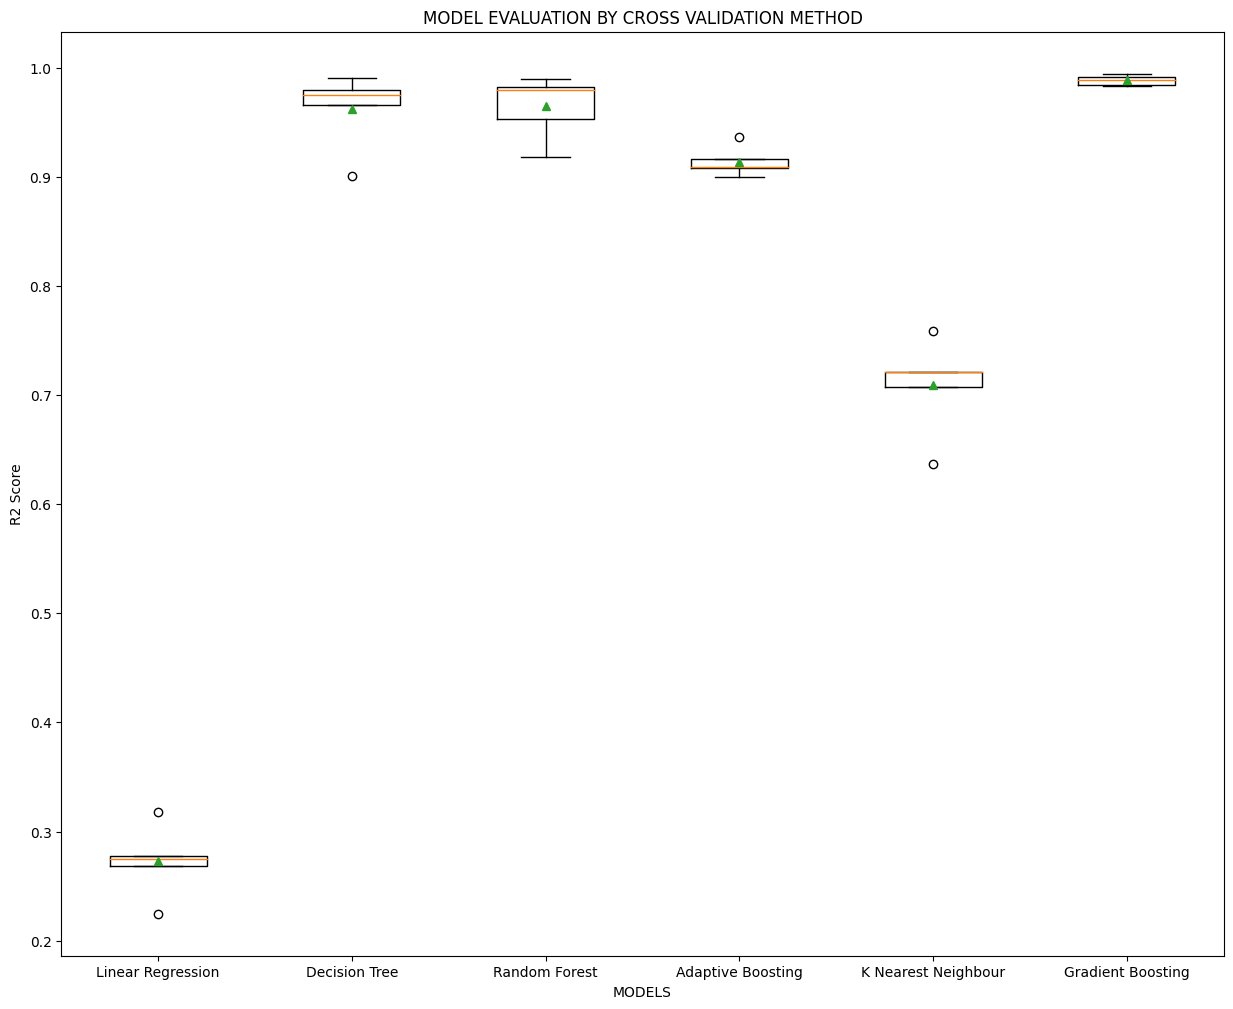

In [ ]:
# Using cross validation method to avoid overfitting
import statistics as st
###############################################################################
# Model building
lin =LinearRegression()
dt=DecisionTreeRegressor(random_state=42)
rf=RandomForestRegressor(random_state=42)
knn=KNeighborsRegressor()
ab=AdaBoostRegressor(random_state=42)
gb=GradientBoostingRegressor(random_state=42)
m  =[lin,dt,rf,ab,knn,gb]
model_name=["Linear Regression","Decision Tree","Random Forest","Adaptive Boosting","K Nearest Neighbour","Gradient Boosting"]

results, mean_results, p, r2_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
  print('\n',i)
  pipe=Pipeline([('model',model)])
  pipe.fit(x_train,y_train)
  cv=KFold(n_splits=5)        # Cross Validation Method (KFOLD cross validation)
  n_scores=cross_val_score(pipe,x_train,y_train,scoring='r2',cv=cv,n_jobs=-1,error_score='raise')
  results.append(n_scores)
  mean_results.append(st.mean(n_scores))
  print('r2-Score(train): mean= (%.3f)'%(st.mean(n_scores)))
  y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
  p.append(y_pred)
  r2=r2_score(y_train,y_pred)
  r2_test.append(r2)
  print('r2-Score(test): %.4f'%(r2))

for i in m:
  algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(15,12))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('R2 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()


* From the Box Plot we can visualize that the **Gradient Boosting** model's R2 Score is coming around 0.988 and also the model having normal distribution & also the model have less disperssion among all the models.
* From the above results we can clearly visualize that **Gradient Boosting** Model performs better & also after applying Cross Validation Method the variance was reduced so the overfitting problem was eliminated.
